In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [5]:
X= df[['year']]
y= df['suicides_no']

# linear regression

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=101)

In [8]:
X_train

,year
7649,2013
13714,2014
13423,1989
7791,1993
22360,2012
...,...
5695,1989
8006,2011
17745,2009
17931,1991


In [11]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])

In [14]:
coeff_df

,Coefficient
year,-0.300512


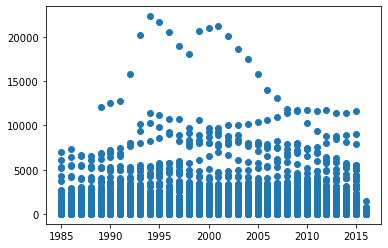

In [18]:
pp.scatter(X,y)

In [19]:
m, c = np.random.random(),np.random.random()

In [22]:
def learn(X, y, m, c, epoch):
  for i in range(epoch):
    error = y-(m*X+c)
    X_error = (y-(m*X+c))*X
    error = np.sum(error)/len(X)
    X_error = np.sum(X_error)/len(X)
    learning_rate = 0.01
    delta_m = learning_rate*X_error
    delta_c = learning_rate*error
    m += delta_m
    c += delta_c
    return (m,c)

In [23]:
m,c = learn(X, y, m, c, 20000)

MemoryError: Unable to allocate 5.77 GiB for an array with shape (27821, 27820) and data type float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# dataset info

In [10]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [11]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [12]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [13]:
df.count()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
country-year          27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

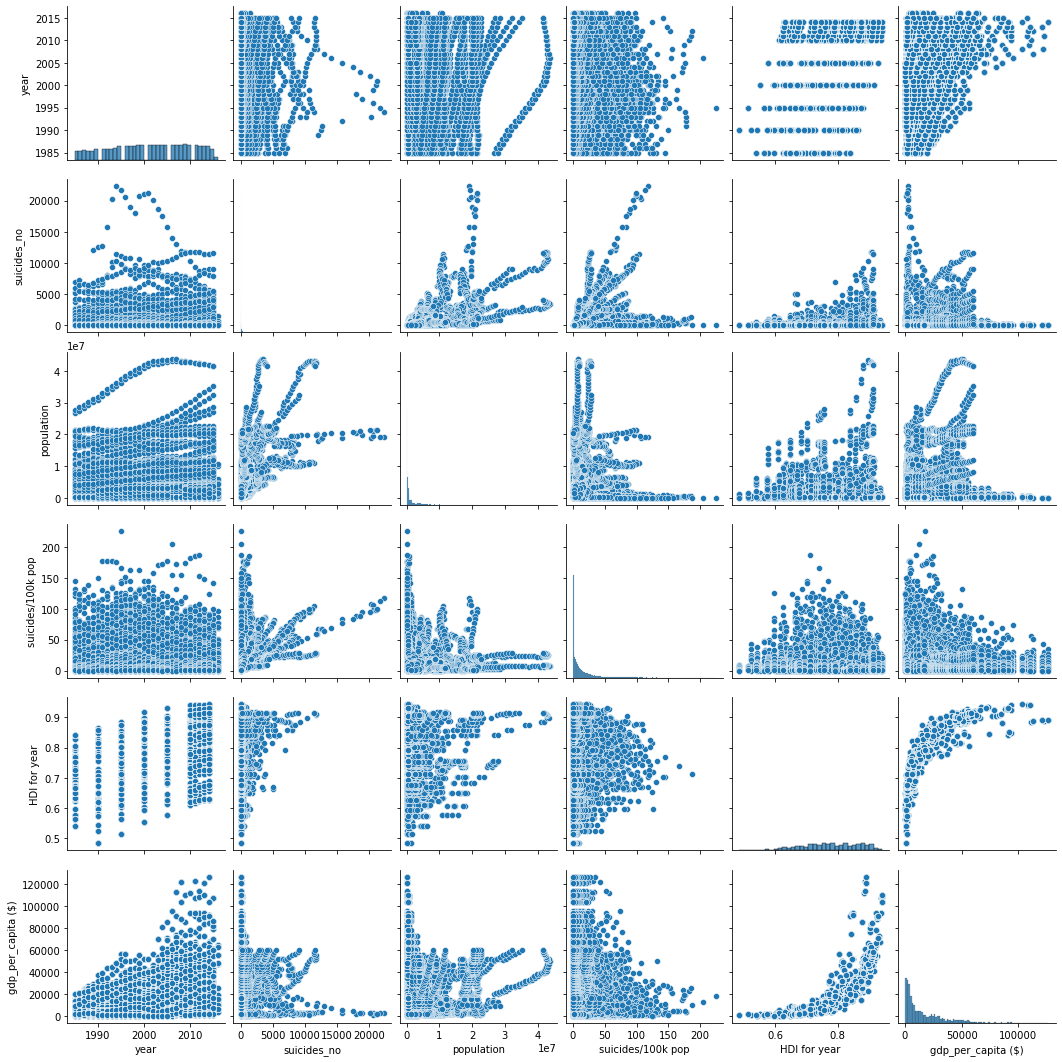

In [14]:
sns.pairplot(df)

<AxesSubplot:>

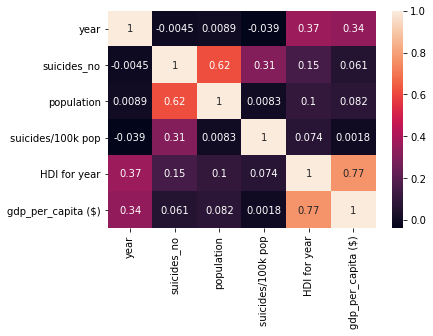

In [15]:
sns.heatmap(df.corr(), annot= True)

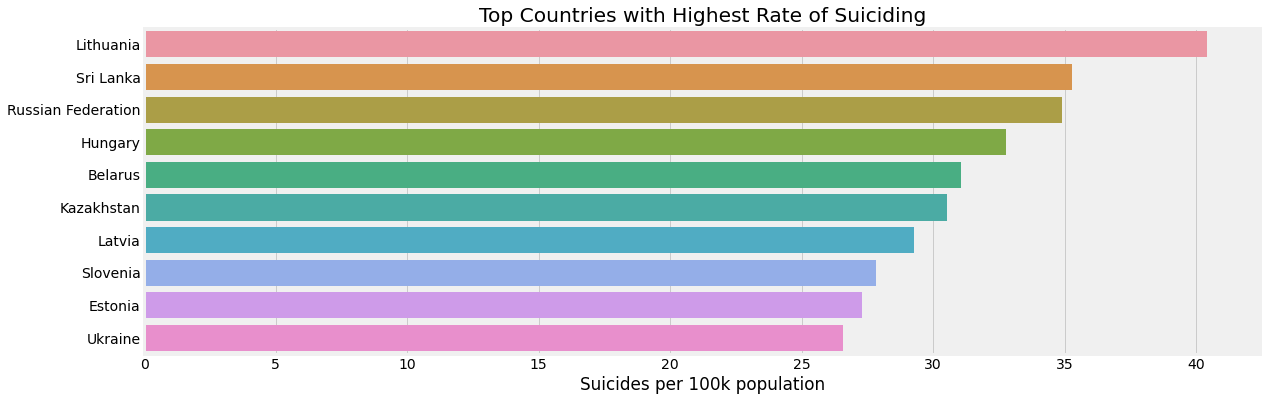

In [16]:
df1 = df.groupby("country").mean().reset_index().sort_values("suicides/100k pop", ascending=False)
plt.figure(figsize=(20,6))
plt.style.use("fivethirtyeight")
sns.barplot(x="suicides/100k pop", y="country",  data=df1.iloc[:10])
plt.title("Top Countries with Highest Rate of Suiciding")
plt.ylabel("")
plt.xlabel("Suicides per 100k population")
plt.show()

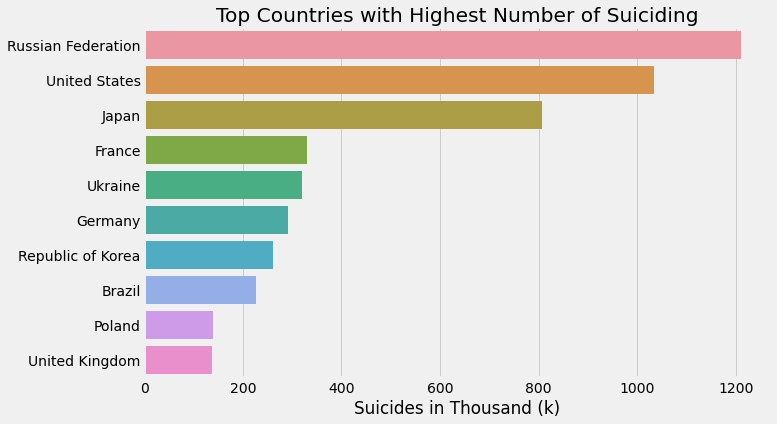

In [17]:
df1 = df.groupby("country").sum().reset_index().sort_values("suicides_no", ascending=False)
df1.suicides_no = (df1.suicides_no/1000)

plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.barplot(x="suicides_no", y="country",  data=df1.iloc[:10])
plt.title("Top Countries with Highest Number of Suiciding")
plt.ylabel("")
plt.xlabel("Suicides in Thousand (k)")
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


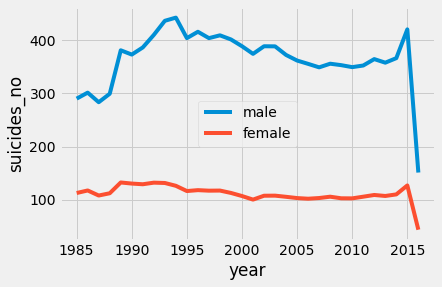

In [18]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

<ipython-input-19-b00578a47fe5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


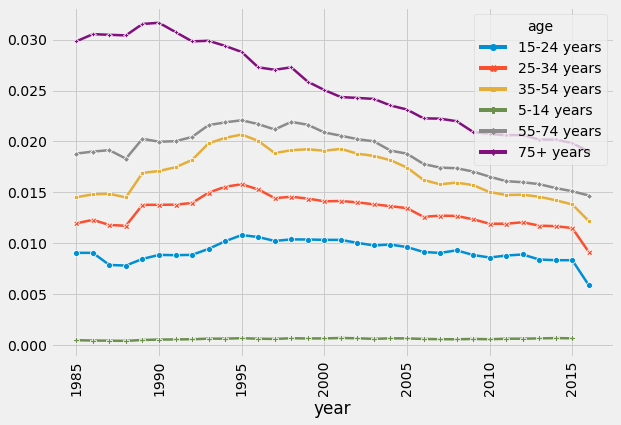

In [19]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

# svm


In [ ]:
feature_df=df[['population', 'gdp_per_capita ($)']]
# x ind
X=np.asarray(feature_df)
y=np.asarray(df['year'])

In [ ]:
#df ---> train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

In [ ]:
from sklearn import svm
classifier= svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)
y_predict= classifier.predict(X_test)